In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('1. Regression - Module - (Housing Prices).csv')

In [3]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [5]:
data['Zipcode'].unique()

array([98178., 98125., 98028., 98136., 98074., 98053., 98003., 98198.,
       98146., 98038., 98007., 98115., 98107., 98126., 98019., 98103.,
       98002., 98133., 98040., 98092., 98030., 98119., 98112., 98052.,
       98027., 98117., 98058., 98001., 98056., 98166., 98023., 98070.,
       98148., 98105., 98042., 98008., 98059., 98122., 98144., 98004.,
       98005., 98034., 98075., 98116., 98010., 98118., 98199., 98032.,
       98045., 98102., 98077., 98108., 98168., 98177., 98065., 98029.,
       98006., 98109., 98022., 98033., 98155., 98024., 98011., 98031.,
       98106., 98072., 98188., 98014., 98055.,    nan, 98039.])

In [6]:
data['Sale Price'].mean()

540198.4357443658

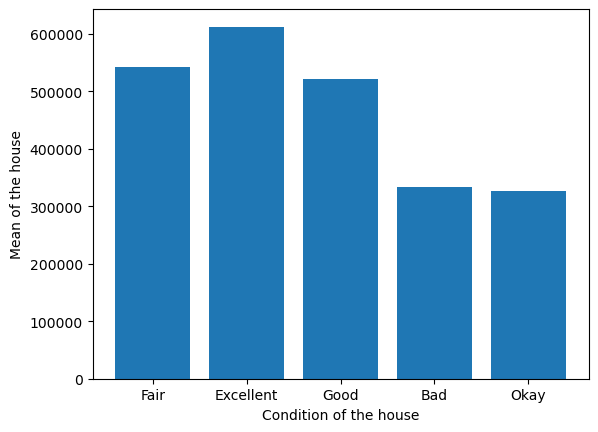

In [7]:
#Initialising a new column
data['condition_sale'] = 0

# Calculating mean based on the condition of the House
for i in data['Condition of the House'].unique():
    data['condition_sale'][data['Condition of the House'] == str(i)] = data['Sale Price'][data['Condition of the House'] == str(i)].mean()

data['condition_sale'].unique()
plt.figure(dpi=100)
plt.bar(data['Condition of the House'].unique(),data['condition_sale'].unique())
plt.xlabel('Condition of the house')
plt.ylabel('Mean of the house')
plt.show()

In [8]:
import time
#Initialising a new column
data['zip_condition_sale'] = 0

C = 'Condition of the House'
Z = "Zipcode"

tick = time.time()
# Calculating mean based on the condition of the House and zipcode
for i in data[C].unique():
  for j in data[Z].unique() :
    data['zip_condition_sale'][(data[C] == str(i)) & (data[Z] == j) ] = data['Sale Price'][(data[C] == str(i)) & (data[Z] == j)].mean()
tock = time.time()
time1 = tock - tick
len(data['zip_condition_sale'].unique())

281

In [9]:
zip_condition_sale=data.groupby(['Condition of the House','Zipcode'])['Sale Price'].mean()

zip_condition_sale
#idk why i used it lecture ko record krte time hoga but present time when I implemented it tb nhi khul rha tha

Condition of the House  Zipcode
Bad                     98004.0    1.500000e+06
                        98006.0    3.725000e+05
                        98011.0    2.700000e+05
                        98023.0    1.500000e+05
                        98024.0    1.420000e+05
                                       ...     
Okay                    98155.0    3.601833e+05
                        98166.0    2.165625e+05
                        98168.0    1.809389e+05
                        98178.0    1.750000e+05
                        98198.0    2.705325e+05
Name: Sale Price, Length: 283, dtype: float64

pivot table is preffered over the groupby function since it displays well organized and short compact display of the output
therefore pandas library discontinued the use of groupby function 


In [10]:
zip_condition_sale2  = pd.pivot_table(data, index=["Condition of the House","Zipcode"], values=["Sale Price"], aggfunc=np.mean,)
zip_condition_sale2

Sale Price
Condition of the House Zipcode              
Bad                    98004.0  1.500000e+06
                       98006.0  3.725000e+05
                       98011.0  2.700000e+05
                       98023.0  1.500000e+05
                       98024.0  1.420000e+05
...                                      ...
Okay                   98155.0  3.601833e+05
                       98166.0  2.165625e+05
                       98168.0  1.809389e+05
                       98178.0  1.750000e+05
                       98198.0  2.705325e+05

[283 rows x 1 columns]

In [11]:
zip_condition_sale3=pd.pivot_table(data,index=["Zipcode"],columns=['Condition of the House'],values=["Sale Price"],aggfunc=np.mean)
zip_condition_sale3

Sale Price                                            \
Condition of the House        Bad     Excellent          Fair          Good   
Zipcode                                                                       
98001.0                       NaN  2.425433e+05  2.927207e+05  2.527446e+05   
98002.0                       NaN  2.216411e+05  2.588868e+05  2.192858e+05   
98003.0                       NaN  3.706800e+05  2.992801e+05  2.809591e+05   
98004.0                 1500000.0  1.236365e+06  1.527265e+06  1.145915e+06   
98005.0                       NaN  8.319500e+05  8.668012e+05  7.669397e+05   
...                           ...           ...           ...           ...   
98177.0                       NaN  8.966313e+05  6.496812e+05  6.665755e+05   
98178.0                       NaN  2.975217e+05  3.094105e+05  3.308419e+05   
98188.0                       NaN  2.853636e+05  2.900059e+05  2.867413e+05   
98198.0                       NaN  3.215235e+05  2.941619e+05  3.154305e+05   
98199.0                       NaN  9.338983e+05  7.604974e+05  7.963811e+05   

                                  
Condition of the House      Okay  
Zipcode                           
98001.0                 356070.0  
98002.0                      NaN  
98003.0                 235500.0  
98004.0                 425000.0  
98005.0                 577750.0  
...                          ...  
98177.0                      NaN  
98178.0                 175000.0  
98188.0                      NaN  
98198.0                 270532.5  
98199.0                      NaN  

[70 rows x 5 columns]

In [12]:
data['plot_length'] = data['Flat Area (in Sqft)']**0.5
data['plot_length'].head()

0    34.351128
1    50.695167
2    27.748874
3    44.271887
4    40.987803
Name: plot_length, dtype: float64

In [13]:
data['new_rank'] = data['Overall Grade']/data['Overall Grade'].sum()
data['new_rank'].unique()

array([4.24844932e-05, 3.64152799e-05, 4.85537065e-05, 6.06921331e-05,
       5.46229198e-05, 3.03460665e-05, 2.42768532e-05, 1.82076399e-05,
       1.21384266e-05, 6.06921331e-06])

In [14]:
data['total_area'] = data['Flat Area (in Sqft)'] + data['Lot Area (in Sqft)']
data['total_area'].head()

0     6830.0
1     9812.0
2    10770.0
3     6960.0
4     9760.0
Name: total_area, dtype: float64

In [15]:
data['Condition of the House'][data['Condition of the House'] == 'Fair'] = '1'
data['Condition of the House'][data['Condition of the House'] == 'Okay'] = '0'
data['Condition of the House'][data['Condition of the House'] == 'Bad'] = '0'
data['Condition of the House'][data['Condition of the House'] == 'Good'] = '1'
data['Condition of the House'][data['Condition of the House'] == 'Excellent'] = '3'
data['Condition of the House'].unique()

array(['1', '3', '0'], dtype=object)

In [16]:
data['Condition of the House']=data['Condition of the House'].map({'Good':'1','Excellent':'3','Bad':'0','Fair': '1',
                                                                   'Okay': '0'})
data['Condition of the House'].unique()

array([nan], dtype=object)

In [17]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_sale,zip_condition_sale,plot_length,new_rank,total_area
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,98178.0,47.5112,-122.257,1340.0,5650,542130.611206,309410.492386,34.351128,0.000042,6830.0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,98125.0,47.7210,-122.319,1690.0,7639,542130.611206,457826.833898,50.695167,0.000042,9812.0
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,98028.0,47.7379,-122.233,2720.0,8062,542130.611206,463785.870192,27.748874,0.000036,10770.0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,98136.0,47.5208,-122.393,1360.0,5000,612577.742504,713929.545455,44.271887,0.000042,6960.0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,98074.0,47.6168,-122.045,1800.0,7503,542130.611206,701063.688312,40.987803,0.000049,9760.0


In [18]:
data['Date House was Sold'].head()

0     14 October 2017
1    14 December 2017
2    15 February 2016
3    14 December 2017
4    15 February 2016
Name: Date House was Sold, dtype: object

In [19]:
year = []
for i in range(len(data['Date House was Sold'])):
  k = data['Date House was Sold'][i].split()[-1]
  year.append(k)

data['year_sold'] = year
data['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [20]:
def year(value):
  return value.split()[-1]

data['year_sold'] = data['Date House was Sold'].map(year)
data['year_sold'].head()

0    2017
1    2017
2    2016
3    2017
4    2016
Name: year_sold, dtype: object

In [21]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_sale,zip_condition_sale,plot_length,new_rank,total_area,year_sold
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,47.5112,-122.257,1340.0,5650,542130.611206,309410.492386,34.351128,0.000042,6830.0,2017
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,47.7210,-122.319,1690.0,7639,542130.611206,457826.833898,50.695167,0.000042,9812.0,2017
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,47.7379,-122.233,2720.0,8062,542130.611206,463785.870192,27.748874,0.000036,10770.0,2016
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,47.5208,-122.393,1360.0,5000,612577.742504,713929.545455,44.271887,0.000042,6960.0,2017
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,47.6168,-122.045,1800.0,7503,542130.611206,701063.688312,40.987803,0.000049,9760.0,2016


In [22]:
data['total_rooms'] = (data['No of Bedrooms'] + data['No of Bathrooms']) * data['No of Floors']
data['total_rooms'].head()

0     4.0
1    10.5
2     3.0
3     7.0
4     5.0
Name: total_rooms, dtype: float64

In [23]:
def Room(row):
  return (row[0] + row[1]) * row[2]

data['total_rooms'] = data[['No of Bedrooms','No of Bathrooms','No of Floors']].apply(Room , axis = 1)
data['total_rooms'].head()

0     4.0
1    10.5
2     3.0
3     7.0
4     5.0
Name: total_rooms, dtype: float64

In [24]:
data[['No of Bedrooms','No of Bathrooms','No of Floors']]

,No of Bedrooms,No of Bathrooms,No of Floors
0,3,1.00,1.0
1,3,2.25,2.0
2,2,1.00,1.0
3,4,3.00,1.0
4,3,2.00,1.0
...,...,...,...
21608,3,2.50,3.0
21609,4,2.50,2.0
21610,2,0.75,2.0
21611,3,2.50,2.0


In [25]:
#### Ignore THIS CELL ####
tick = time.time()
data['total_rooms'] = (data['No of Bedrooms'] + data['No of Bathrooms']) * data['No of Floors']
tock = time.time()
time1 = tock-tick

In [26]:
#### IGNORE THIS CELL ####
tick = time.time()
def Room(row):
  return (row[0] + row[1]) * row[2]

data['total_rooms'] = data[['No of Bedrooms','No of Bathrooms','No of Floors']].apply(Room , axis = 1)
tock = time.time()
time2 = tock-tick

In [27]:
time1/time2

0.02093096924894235

In [28]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_sale,zip_condition_sale,plot_length,new_rank,total_area,total_rooms
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,...,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,2.161300e+04,21604.000000,21613.000000,2.159500e+04,21609.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,...,47.560048,-122.213892,1986.538914,12768.455652,540197.828499,5.401514e+05,44.597182,0.000046,1.719020e+04,8.493203
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,...,0.138565,0.140830,685.404255,27304.179631,30467.430837,2.438357e+05,9.540825,0.000007,4.160455e+04,4.380045
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,...,47.155900,-122.519000,399.000000,651.000000,327316.215116,0.000000e+00,17.029386,0.000006,1.423000e+03,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,...,47.470975,-122.328000,1490.000000,5100.000000,521277.510567,3.473329e+05,37.805419,0.000042,7.037500e+03,4.750000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,...,47.571800,-122.230000,1840.000000,7620.000000,542130.611206,5.236338e+05,43.703547,0.000042,9.575000e+03,7.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,...,47.678000,-122.125000,2360.000000,10083.000000,542130.611206,6.551002e+05,50.497525,0.000049,1.300000e+04,12.500000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,...,47.777600,-121.315000,6210.000000,871200.000000,612577.742504,2.560000e+06,116.361506,0.000061,1.652659e+06,45.000000


In [29]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_sale,zip_condition_sale,plot_length,new_rank,total_area,year_sold,total_rooms
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,-122.257,1340.0,5650,542130.611206,309410.492386,34.351128,0.000042,6830.0,2017,4.0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,-122.319,1690.0,7639,542130.611206,457826.833898,50.695167,0.000042,9812.0,2017,10.5
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,-122.233,2720.0,8062,542130.611206,463785.870192,27.748874,0.000036,10770.0,2016,3.0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,-122.393,1360.0,5000,612577.742504,713929.545455,44.271887,0.000042,6960.0,2017,7.0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,-122.045,1800.0,7503,542130.611206,701063.688312,40.987803,0.000049,9760.0,2016,5.0


In [30]:
data['luxury_home'] = 0

for i in range(len(data)):
  count = 0
  if data['Waterfront View'][i] == 'Yes':
    count = count+1
  if data['Condition of the House'][i] in ['Good','Excellent']:
    count = count+1    
  if data['Overall Grade'][i] >= 8:
    count = count+1
  if count >= 2:
    data['luxury_home'][i] = 'Yes'
  else:
    data['luxury_home'][i] = 'No'
    
data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

In [31]:
def luxury_home(row):
  count = 0
  if row[0] =='Yes':
    count = count+1
  if row[1] in ['Good', 'Excellent']:
    count = count+1
  if row[2] >= 8:
    count = count+1  
  if count >= 2:
    return 'Yes'
  else:
    return "No"
  
data['luxury_home'] = data[['Waterfront View','Condition of the House','Overall Grade']].apply(luxury_home, axis = 1)

data['luxury_home'].unique()

array(['No', 'Yes'], dtype=object)

In [32]:
luxury_home(['Yes','Good', 5])

'Yes'

In [33]:
data.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),condition_sale,zip_condition_sale,plot_length,new_rank,total_area,total_rooms
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,...,21612.000000,21612.000000,21612.000000,21613.000000,21613.000000,2.161300e+04,21604.000000,21613.000000,2.159500e+04,21609.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,...,47.560048,-122.213892,1986.538914,12768.455652,540197.828499,5.401514e+05,44.597182,0.000046,1.719020e+04,8.493203
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,...,0.138565,0.140830,685.404255,27304.179631,30467.430837,2.438357e+05,9.540825,0.000007,4.160455e+04,4.380045
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,...,47.155900,-122.519000,399.000000,651.000000,327316.215116,0.000000e+00,17.029386,0.000006,1.423000e+03,0.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,...,47.470975,-122.328000,1490.000000,5100.000000,521277.510567,3.473329e+05,37.805419,0.000042,7.037500e+03,4.750000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,...,47.571800,-122.230000,1840.000000,7620.000000,542130.611206,5.236338e+05,43.703547,0.000042,9.575000e+03,7.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,...,47.678000,-122.125000,2360.000000,10083.000000,542130.611206,6.551002e+05,50.497525,0.000049,1.300000e+04,12.500000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,...,47.777600,-121.315000,6210.000000,871200.000000,612577.742504,2.560000e+06,116.361506,0.000061,1.652659e+06,45.000000


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [35]:
data['Sale Price'].head(10)

0     221900.0
1     538000.0
2     180000.0
3     604000.0
4     510000.0
5    1230000.0
6     257500.0
7     291850.0
8     229500.0
9     323000.0
Name: Sale Price, dtype: float64

In [36]:
data['Sale Price'].tail(10)

21603     507250.0
21604     429000.0
21605     610685.0
21606    1010000.0
21607     475000.0
21608     360000.0
21609     400000.0
21610     402101.0
21611     400000.0
21612     325000.0
Name: Sale Price, dtype: float64

In [37]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [38]:
import matplotlib.pyplot as plt 

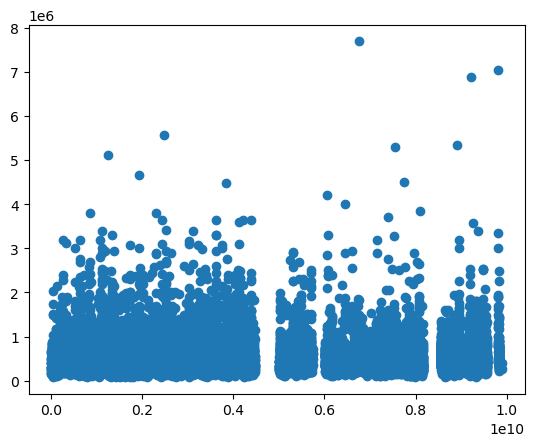

In [39]:
plt.scatter(x=data['ID'],y=data['Sale Price'])

In [40]:
# The matplotlib library doesn't have the capabilty to ignore the missing values for the variables therefore 
# we will use seaborn library to plot the boxplot and check for the missing outlier value

import seaborn as sns

<Axes: xlabel='Sale Price'>

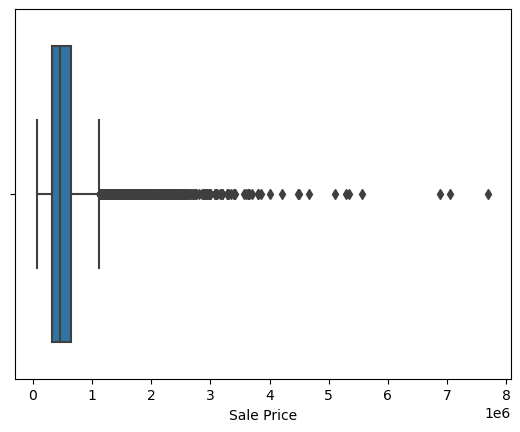

In [41]:
sns.boxplot(x=data['Sale Price'])

In [42]:
q1=data['Sale Price'].quantile(.25)
q3=data['Sale Price'].quantile(.75)
iqr=q3-q1
iqr

323050.0

In [43]:
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
lower_limit,upper_limit

(-162625.0, 1129575.0)

In [44]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [45]:
# function to replace the outlier values to the limiting value by using the imputing method

def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    if value<lower_limit:
        return lower_limit
    else:
        return value

In [46]:
data['Sale Price']=data['Sale Price'].apply(limit_imputer)

In [47]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [48]:
# after updating and fixing the outliers the new csv file is uploaded

data1 = pd.read_csv('Raw_Housing_Prices2.csv')

In [49]:
# non null values are listed in the table as total no. of rows are 21613 and no. of rows in sale price is 21609 therefore
# 4 values of the sale price are missing

data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [50]:
data1.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [51]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

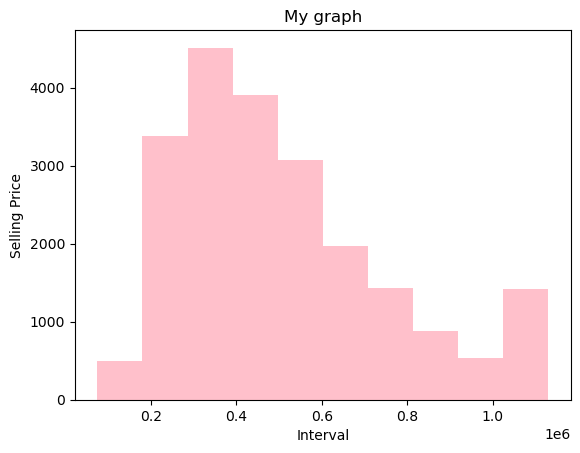

In [52]:
plt.hist(data1['Sale Price'],bins=10,color='pink')
plt.xlabel('Interval')
plt.ylabel('Selling Price')
plt.title('My graph')
plt.show()

# this graph is skewed towards the lower values

In [53]:
data1.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

# Now we will deal with the INDEPENDENT variable

In [54]:
len(data1['Latitude'].unique())

5034

In [55]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [56]:
data1.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   0
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [57]:
numerical_columns=['No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)',
                   'Latitude','Longitude','Living Area after Renovation (in Sqft)']
#'zipcode' is left willingly for exploration function.

In [58]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
data1[numerical_columns]=imputer.fit_transform(data1[numerical_columns])

In [59]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [60]:
data1['Zipcode'].shape

(21609,)

In [61]:
column=data1['Zipcode'].values.reshape(-1,1)
column.shape
#syntax of the reshape function is (row,column)

(21609, 1)

In [62]:
column=data1['Zipcode'].values.reshape(-1,1)
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
data1['Zipcode']=imputer.fit_transform(column)

In [63]:
data1.info

<bound method DataFrame.info of                ID Date House was Sold  Sale Price  No of Bedrooms  \
0      7129300520     14 October 2017    221900.0               3   
1      6414100192    14 December 2017    538000.0               3   
2      5631500400    15 February 2016    180000.0               2   
3      2487200875    14 December 2017    604000.0               4   
4      1954400510    15 February 2016    510000.0               3   
...           ...                 ...         ...             ...   
21604   263000018         14 May 2017    360000.0               3   
21605  6600060120    15 February 2016    400000.0               4   
21606  1523300141        14 June 2017    402101.0               2   
21607   291310100     15 January 2016    400000.0               3   
21608  1523300157     14 October 2017    325000.0               2   

       No of Bathrooms  Flat Area (in Sqft)  Lot Area (in Sqft)  No of Floors  \
0                 1.00               1180.0              5

In [64]:
data1['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [65]:
mapping={'None':"0",'Once':"1",'Twice':"2",'Thrice':"3",'Four':"4"}

In [66]:
# mapping function is a pandas library function

data1['No of Times Visited']=data1['No of Times Visited'].map(mapping)

In [67]:
data1['No of Times Visited'].unique()

array(['0', '3', '4', '2', '1'], dtype=object)

In [68]:
#FOR THIS WE USE THE var FUNCTION OF THE numpy library
data1['Ever Renovated']=np.where(data1['Renovated Year']==0,'NO','YES')

In [69]:
data1.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650,NO
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639,YES
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062,NO
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000,NO
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503,NO


In [70]:
#years since renovation = year of sale - year of renovation

data1['Purchase Year']=pd.DatetimeIndex(data1['Date House was Sold']).year

In [71]:
data1['Year Since Renovation']=np.where(data1['Ever Renovated']=='YES',
                                       abs(data1['Purchase Year']-data1['Renovated Year']),0)

In [72]:
data1.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purchase Year,Year Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,...,63,0,98178.0,47.5112,-122.257,1340.0,5650,NO,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,...,67,1991,98125.0,47.7210,-122.319,1690.0,7639,YES,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,0,...,85,0,98028.0,47.7379,-122.233,2720.0,8062,NO,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,...,53,0,98136.0,47.5208,-122.393,1360.0,5000,NO,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,...,31,0,98074.0,47.6168,-122.045,1800.0,7503,NO,2016,0


In [73]:
# We will drop the variables'Date House was Sold','Purchase Year' and 'Renovated Year' since we wont need them for any case
data1.drop(columns=['Date House was Sold','Purchase Year','Renovated Year'],inplace=True)

In [74]:
data1.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Year Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,NO,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,YES,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,NO,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,NO,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,NO,0


In [75]:
data1.to_csv('Transformed_Housing_Data',index=False)

# CORRELATION


In [76]:
data2=pd.read_csv('Transformed_Housing_Data')
data2.head()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,...,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Year Since Renovation
0,7129300520,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,...,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,NO,0
1,6414100192,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,...,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,YES,26
2,5631500400,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,...,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,NO,0
3,2487200875,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,...,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,NO,0
4,1954400510,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,...,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,NO,0


In [77]:
data2['Sale Price'].corr(data2['Flat Area (in Sqft)'])

0.6951704258420672

In [78]:
np.corrcoef(data2['Sale Price'],data2['Flat Area (in Sqft)'])

array([[1.        , 0.69517043],
       [0.69517043, 1.        ]])

In [79]:
data2.drop(columns=['ID'],axis=1).corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Year Since Renovation
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.356114,0.680914,0.606527,0.307513,-0.064306,-0.043047,0.402430,0.045401,0.629944,0.092325,0.065907
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,0.079575,0.349223,0.477549,0.303294,-0.154113,-0.152760,-0.008708,0.129569,0.391771,0.029264,-0.007198
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.187791,0.635638,0.685088,0.283798,-0.505954,-0.203951,0.024570,0.223171,0.568568,0.087226,0.003551
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.284678,0.705725,0.876226,0.435142,-0.318146,-0.199380,0.052538,0.240091,0.756185,0.183223,0.023503
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.074668,0.102314,0.183492,0.015252,-0.053119,-0.129551,-0.085719,0.229449,0.144507,0.718527,0.013835
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.029504,0.461368,0.524031,-0.245572,-0.489244,-0.059222,0.049692,0.125620,0.280106,-0.011204,-0.000901
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,1.000000,0.223661,0.167812,0.276974,0.053395,0.084830,0.006162,-0.078453,0.280452,0.072561,0.093546
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.223661,1.000000,0.705153,0.145232,-0.456711,-0.185844,0.111226,0.201736,0.681362,0.107581,-0.024388
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.167812,0.705153,1.000000,-0.051825,-0.423848,-0.261124,-0.000819,0.343793,0.731996,0.194106,0.010491
Basement Area (in Sqft),0.307513,0.303294,0.283798,0.435142,0.015252,-0.245572,0.276974,0.145232,-0.051825,1.000000,0.133072,0.074933,0.110451,-0.144822,0.200302,0.017263,0.029158


# CATEGORICAL VARIABLE

In [80]:
data2.info()
# variable with Dtype as object are the categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Sale Price                                 21609 non-null  float64
 2   No of Bedrooms                             21609 non-null  int64  
 3   No of Bathrooms                            21609 non-null  float64
 4   Flat Area (in Sqft)                        21609 non-null  float64
 5   Lot Area (in Sqft)                         21609 non-null  float64
 6   No of Floors                               21609 non-null  float64
 7   Waterfront View                            21609 non-null  object 
 8   No of Times Visited                        21609 non-null  int64  
 9   Condition of the House                     21609 non-null  object 
 10  Overall Grade         

In [81]:
data2.drop(columns=['ID'],inplace=True)

In [82]:
data2['Condition of the House'].head(15)

0          Fair
1          Fair
2          Fair
3     Excellent
4          Fair
5          Fair
6          Fair
7          Fair
8          Fair
9          Fair
10         Fair
11         Good
12         Good
13         Good
14         Fair
Name: Condition of the House, dtype: object

In [83]:
data2['Condition of the House'].unique()

array(['Fair', 'Excellent', 'Good', 'Bad', 'Okay'], dtype=object)

In [84]:
data2['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

<Axes: xlabel='Condition of the House'>

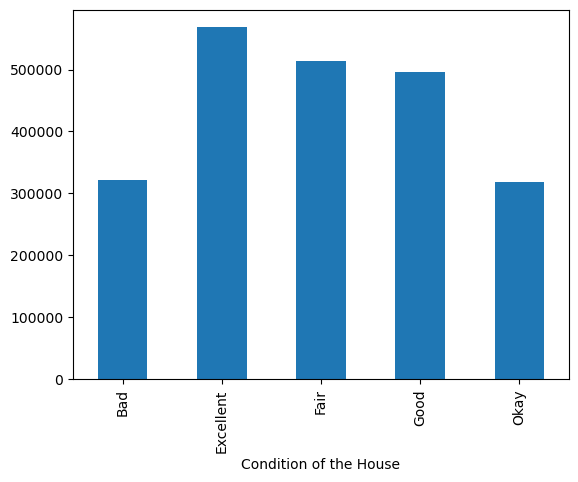

In [85]:
data2.groupby('Condition of the House',)['Sale Price'].mean().plot(kind='bar')

<Axes: xlabel='Condition of the House'>

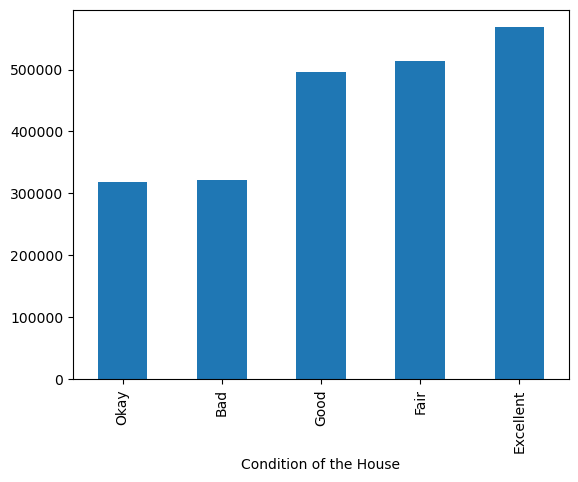

In [86]:
data2.groupby('Condition of the House',)['Sale Price'].mean().sort_values().plot(kind='bar')

<Axes: xlabel='Zipcode'>

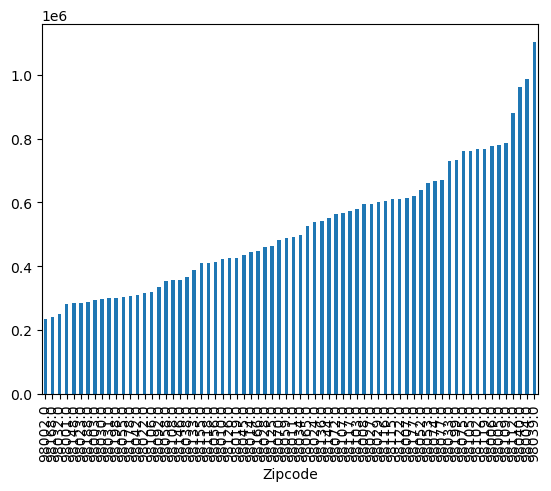

In [87]:
data2.groupby('Zipcode',)['Sale Price'].mean().sort_values().plot(kind='bar')

# ANOVA

In [88]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [89]:
data2=data2.rename(columns={'Sale Price' : 'Sale_Price','Condition of the House' : 'Condition_of_the_House',
                           'Ever Renovated' : 'Ever_Renovated','Waterfront View' : 'Waterfront_View'})

# only the categorical variable(objects) are renamed as python don't accept the blank spaces between the variable names

In [90]:
data2.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Condition_of_the_House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Year Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,NO,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,YES,26
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,NO,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,NO,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,NO,0


In [91]:
data2['Waterfront_View'].unique()

array(['No', 'Yes'], dtype=object)

In [92]:
mod = ols('Sale_Price ~ Condition_of_the_House', data  = data2).fit()

In [93]:
Anova_table=sm.stats.anova_lm(mod,typ=2)

In [94]:
print(Anova_table)

                              sum_sq       df         F        PR(>F)
Condition_of_the_House  1.441831e+13      4.0  58.25563  5.447605e-49
Residual                1.336752e+15  21604.0       NaN           NaN


In [95]:
mod = ols('Sale_Price ~ Waterfront_View', data  = data2).fit()
sm.stats.anova_lm( mod, typ = 2)

,sum_sq,df,F,PR(>F)
Waterfront_View,3.283737e+13,1.0,538.192683,1.275558e-117
Residual,1.318333e+15,21607.0,NaN,NaN


In [96]:
mod = ols('Sale_Price ~ Ever_Renovated', data  = data2).fit()
sm.stats.anova_lm( mod, typ = 2)

,sum_sq,df,F,PR(>F)
Ever_Renovated,1.998463e+13,1.0,324.378469,5.419055e-72
Residual,1.331185e+15,21607.0,NaN,NaN


In [97]:
mod = ols('Sale_Price ~ Zipcode', data  = data2).fit()
sm.stats.anova_lm( mod, typ = 2)

,sum_sq,df,F,PR(>F)
Zipcode,2.503765e+12,1.0,40.112844,2.444308e-10
Residual,1.348666e+15,21607.0,NaN,NaN


# DUMMY VARIABLES

In [98]:
data2=pd.get_dummies(data2,columns=['Condition_of_the_House'],drop_first=True)

In [99]:
data2.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront_View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever_Renovated,Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay
0,221900.0,3,1.00,1180.0,5650.0,1.0,No,0,7,1180.0,...,47.5112,-122.257,1340.0,5650,NO,0,0,1,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,No,0,7,2170.0,...,47.7210,-122.319,1690.0,7639,YES,26,0,1,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,No,0,6,770.0,...,47.7379,-122.233,2720.0,8062,NO,0,0,1,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,No,0,7,1050.0,...,47.5208,-122.393,1360.0,5000,NO,0,1,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,No,0,8,1680.0,...,47.6168,-122.045,1800.0,7503,NO,0,0,1,0,0


In [100]:
data2=pd.get_dummies(data2,columns=['Ever_Renovated','Waterfront_View'])

In [101]:
data2.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Lot Area after Renovation (in Sqft),Year Since Renovation,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_NO,Ever_Renovated_YES,Waterfront_View_No,Waterfront_View_Yes
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,5650,0,0,1,0,0,1,0,1,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,7639,26,0,1,0,0,0,1,1,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,8062,0,0,1,0,0,1,0,1,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,5000,0,1,0,0,0,1,0,1,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,7503,0,0,1,0,0,1,0,1,0


# BINNING

In [102]:
zip_table=data2.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values('Sale_Price',ascending=True)

In [103]:
zip_table.head()

,Sale_Price
Zipcode,
98002.0,234284.035176
98168.0,240328.371747
98032.0,251296.240000
98001.0,280804.690608
98148.0,284908.596491


In [104]:
zip_table['zipcode_group']=pd.cut(zip_table['Sale_Price'],bins=10,
                                  labels=['zipcode_group_0', 
                                          'zipcode_group_1',
                                          'zipcode_group_2',
                                          'zipcode_group_3',
                                          'zipcode_group_4',
                                          'zipcode_group_5',
                                          'zipcode_group_6',
                                          'zipcode_group_7',
                                          'zipcode_group_8',
                                          'zipcode_group_9'],include_lowest=True)

In [105]:
data2=pd.merge(data2,zip_table,left_on='Zipcode',how='left',right_index=True)

In [106]:
data2=data2.drop(columns=['Zipcode'])

In [107]:
data2.head()

,Sale_Price_x,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Condition_of_the_House_Excellent,Condition_of_the_House_Fair,Condition_of_the_House_Good,Condition_of_the_House_Okay,Ever_Renovated_NO,Ever_Renovated_YES,Waterfront_View_No,Waterfront_View_Yes,Sale_Price_y,zipcode_group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,1,0,0,1,0,1,0,308435.561069,zipcode_group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,1,0,0,0,1,1,0,462330.404878,zipcode_group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,1,0,0,1,0,1,0,460825.088339,zipcode_group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,1,0,0,0,1,0,1,0,540466.049430,zipcode_group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,1,0,0,1,0,1,0,666588.201814,zipcode_group_4


In [108]:
data3=pd.read_csv('Transformed_Housing_Data2(1).csv')

In [109]:
Y=data3.iloc[:,0]

In [110]:
X=data3.iloc[:,1:31]

In [111]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,63,...,0,0,0,0,0,0,0,0,0,0
1,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,67,...,0,0,1,0,0,0,0,0,0,0
2,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,85,...,0,0,1,0,0,0,0,0,0,0
3,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,53,...,0,0,0,1,0,0,0,0,0,0
4,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,31,...,0,0,0,0,1,0,0,0,0,0


In [112]:
Y.head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: Sale_Price, dtype: float64

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [114]:
X_train.shape

(15126, 30)

In [115]:
X_test.shape

(6483, 30)

In [116]:
Y_train.shape

(15126,)

In [117]:
Y_test.shape

(6483,)

# Standardisation

In [118]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()

X_train = scale.fit_transform(X_train)
X_train
#Fitting and transforming the data for X_Train' which contains all the features for the Train dataset.

array([[-0.39542641,  0.50168857,  0.6318297 , ..., -0.11157867,
        -0.17309104, -0.05018523],
       [ 0.66375897,  0.8257913 , -0.17558005, ..., -0.11157867,
        -0.17309104, -0.05018523],
       [-0.39542641, -1.4429278 , -0.44835361, ..., -0.11157867,
        -0.17309104, -0.05018523],
       ...,
       [-0.39542641, -0.47061962, -0.83023659, ..., -0.11157867,
        -0.17309104, -0.05018523],
       [-0.39542641,  0.50168857, -0.59019586, ..., -0.11157867,
        -0.17309104, -0.05018523],
       [ 0.66375897,  0.50168857,  0.62091875, ..., -0.11157867,
        -0.17309104, -0.05018523]])

In [119]:
X_test  = scale.transform(X_test)
X_test

array([[-2.51379716, -0.79472234, -1.38669466, ..., -0.11157867,
        -0.17309104, -0.05018523],
       [-0.39542641, -1.4429278 , -0.90661319, ..., -0.11157867,
        -0.17309104, -0.05018523],
       [ 1.72294435,  0.17758584,  0.5554531 , ..., -0.11157867,
        -0.17309104, -0.05018523],
       ...,
       [ 0.66375897,  0.17758584,  0.24994671, ..., -0.11157867,
        -0.17309104, -0.05018523],
       [-0.39542641, -1.4429278 , -0.79750376, ..., -0.11157867,
        -0.17309104, -0.05018523],
       [ 0.66375897,  0.50168857,  1.60290357, ..., -0.11157867,
        -0.17309104, -0.05018523]])